In [1]:
###! METADATA !###

#     Author  :  Abu Bakar Siddique Arman
#      Email  :  abubakar.arman.cse@gmail.com
#     Github  :  https://github.com/abubakar-arman
#   LinkedIn  :  https://www.linkedin.com/in/abubakar-arman/
#    Youtube  :  https://www.youtube.com/@arman-bhaai
#   Facebook  :  https://www.facebook.com/arman.bhaai/

#    Dataset  :  https://www.kaggle.com/competitions/spaceship-titanic/data

In [2]:
# %pip install imblearn
import pandas as pd

## Load Dataset

In [3]:
df = pd.read_csv('dataset/spaceship-titanic.csv')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


## Data Visualization and Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

## Null Values Elimination

In [6]:
for feature in ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    df[feature] = df[feature].fillna(df[feature].mean)
    
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [7]:
df['Transported'].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

In [8]:
df['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [9]:
planet_transported = df.groupby(['HomePlanet', 'Transported']).size().unstack()
planet_transported

Transported,False,True
HomePlanet,,
Earth,2651,1951
Europa,727,1404
Mars,839,920


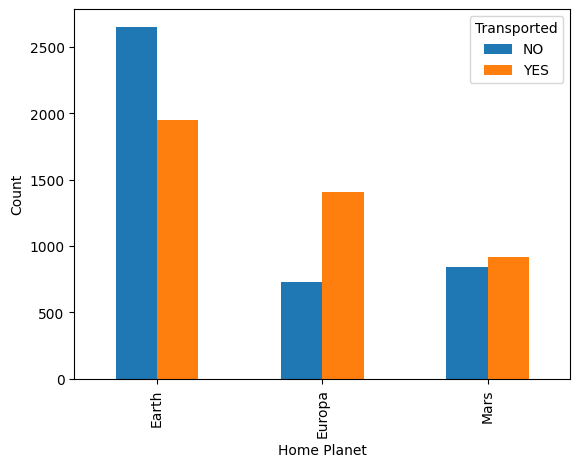

In [10]:
import matplotlib.pyplot as plt
planet_transported.plot(kind='bar')
plt.legend(title='Transported', labels=['NO', 'YES'])
plt.xlabel('Home Planet')
plt.ylabel('Count')
plt.show()

## Encode Categorical Features

In [11]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [12]:
for col in df.select_dtypes(include=['object','boolean']).columns:
    df[col] = df[col].astype('category').cat.codes

df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,1,0,149,2,0,0,0,0,0,0,0,5252,0
1,1,0,0,2184,2,1,0,1,1,1,1,1,4502,1
2,2,1,0,1,2,2,1,2,2,0,2,2,457,0
3,3,1,0,1,2,3,0,0,3,2,3,3,7149,0
4,4,0,0,2186,2,4,0,3,4,3,4,4,8319,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,8688,1,0,146,0,55,1,0,1506,0,1327,41,3524,0
8689,8689,0,1,5280,1,41,0,0,0,0,0,0,4780,0
8690,8690,0,0,5285,2,6,0,0,0,1115,26,0,3002,1
8691,8691,1,0,2131,0,12,0,0,1159,0,951,1306,1596,0


## Feature Set

In [13]:
X = df.drop('Transported', axis=1)
y = df['Transported']

## Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((6954, 13), (1739, 13))

## Declare Classification Models

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Classifiers
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='rbf', probability=True)
nb = GaussianNB()
dtree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)


## Cross Validation

In [16]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

# SMOTE 
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

c:\Users\Arman_Bhaai\miniconda3\envs\global\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Arman_Bhaai\miniconda3\envs\global\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


## Model Training and Accuracy Evaluation

In [17]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

def print_output(title, accuracies, precisions, recalls, f1s): 
    print(f"""\n {title}
Accuracy : {np.mean(accuracies):.4f} +/- {np.std(accuracies):.4f}
Precision : {np.mean(precisions):.4f} +/- {np.std(precisions):.4f}
Recall : {np.mean(recalls):.4f} +/- {np.std(recalls):.4f}
F1 Score: {np.mean(f1s):.4f} +/- {np.std(f1s):.4f}
""")
    
def print_confusion_matrix(y_val_fold, y_pred):
    cm = metrics.confusion_matrix(y_val_fold, y_pred)
    print("### Confusion Matrix ###\n", cm)
    plt.matshow(cm, cmap='coolwarm')
    plt.colorbar()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    

def show_results(model, title):
    accuracies, precisions, recalls, f1s = [], [], [], []
    for train_index, val_index in skf.split(X_train_smote, y_train_smote):
        X_train_fold, X_val_fold = X_train_smote.iloc[train_index], X_train_smote.iloc[val_index]
        y_train_fold, y_val_fold = y_train_smote.iloc[train_index], y_train_smote.iloc[val_index]

        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_val_fold)

        accuracies.append(metrics.accuracy_score(y_val_fold, y_pred))
        precisions.append(metrics.precision_score(y_val_fold, y_pred))
        recalls.append(metrics.recall_score(y_val_fold, y_pred))
        f1s.append(metrics.f1_score(y_val_fold, y_pred))

    
    print_output(title, accuracies, precisions, recalls, f1s)
    print_confusion_matrix(y_val_fold, y_pred)



 ### KNN Results ###
Accuracy : 0.6666 +/- 0.0034
Precision : 0.6500 +/- 0.0040
Recall : 0.7220 +/- 0.0042
F1 Score: 0.6841 +/- 0.0025

### Confusion Matrix ###
 [[722 444]
 [331 836]]


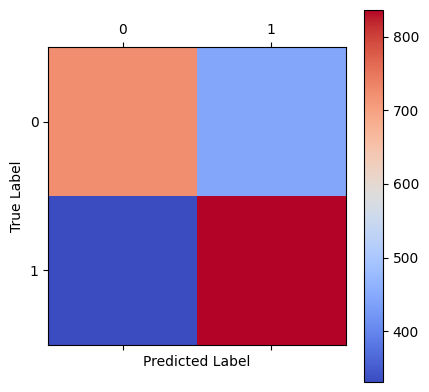

In [18]:
show_results(knn, '### KNN Results ###')


 ### SVM Results ###
Accuracy : 0.7210 +/- 0.0029
Precision : 0.7164 +/- 0.0042
Recall : 0.7317 +/- 0.0121
F1 Score: 0.7239 +/- 0.0049

### Confusion Matrix ###
 [[812 354]
 [298 869]]


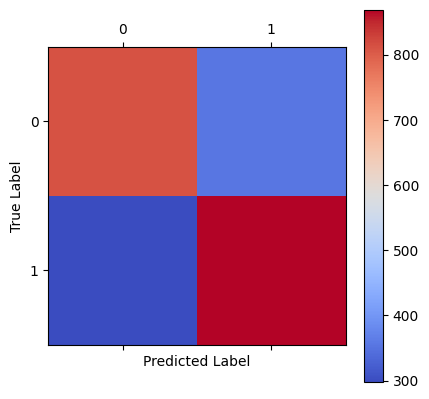

In [19]:
show_results(svm, '### SVM Results ###')


 ### Naive Bayes Results ###
Accuracy : 0.6904 +/- 0.0096
Precision : 0.6602 +/- 0.0087
Recall : 0.7849 +/- 0.0094
F1 Score: 0.7171 +/- 0.0085

### Confusion Matrix ###
 [[691 475]
 [240 927]]


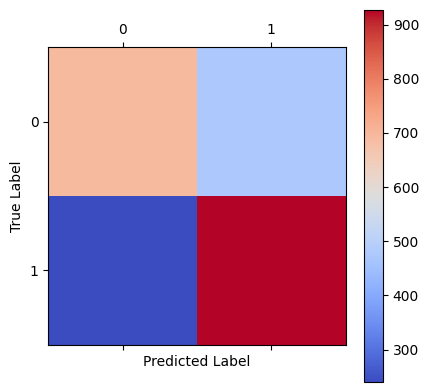

In [20]:
show_results(nb, '### Naive Bayes Results ###')


 ### Decision Trees Results ###
Accuracy : 0.6901 +/- 0.0058
Precision : 0.6899 +/- 0.0070
Recall : 0.6909 +/- 0.0041
F1 Score: 0.6904 +/- 0.0051

### Confusion Matrix ###
 [[818 348]
 [356 811]]


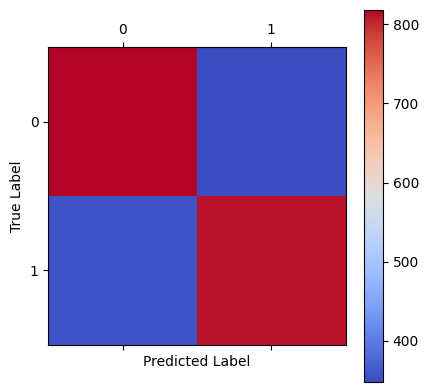

In [21]:
show_results(dtree, '### Decision Trees Results ###')


 ### Random Forest Results ###
Accuracy : 0.7629 +/- 0.0020
Precision : 0.7932 +/- 0.0051
Recall : 0.7111 +/- 0.0061
F1 Score: 0.7499 +/- 0.0024

### Confusion Matrix ###
 [[946 220]
 [329 838]]


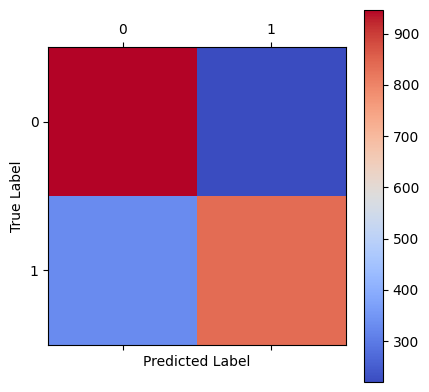

In [22]:
# metrics.classification_report(y_test, model.predict(X_test))
show_results(rf, '### Random Forest Results ###')